# Deppisch et al, 1993
Fixes some problems in MacGregor and Oliver

In [1]:
from brian2 import *
%matplotlib inline
rcParams['figure.figsize'] = [8.0, 6.0]

In [2]:
def plotdepp_SC(M, SC):
    # ax1 = subplot(311, frameon=False)
    gs = GridSpec(3, 1, height_ratios = [5, 1, 2])
    ax1 = subplot(gs[0]) # , frameon=False)
    plot(M.t/ms, M.E[0], label='E')
    plot(M.t/ms, M.theta[0], label='theta')
    #plot(M.t/ms, M.iSC[0], label='iSC')
    axhline(SC, ls='--', c='k', label='SC={}'.format(SC))
    setp(ax1.get_xticklabels(), visible=False)
    ylabel('E, theta, in')
    legend()

    # ax3 = subplot(313, sharex = ax1, frameon=False)
    ax3 = subplot(gs[1], sharex = ax1) #, frameon=False)
    plot(M.t/ms, M.o[0], label='o')
    setp(ax3.get_xticklabels(), visible=False)
    ylabel('o')

    # plot(M.t/ms, M.G_e[0], label='G_e')
    # ax2 = subplot(312, sharex = ax1, frameon=False)
    ax2 = subplot(gs[2], sharex = ax1) # , frameon=False)
    plot(M.t/ms, M.g_K[0], label='g_K')
    ylabel('g_K')
    xlabel('t [ms]');

# The Model

In [13]:
eqs = '''
# Equation 1a
# SC = supplied current
# Should this be over a time constant? Yes!
dE/dt = (-(E - E_0) - (g_K - g_K_0) * (E - E_K) + SC - G_e * (E - E_ex) - G_i * (E-E_in))/tau_E + eta/tau_E**.5*xi : 1

# Equation 1b is for theta
dtheta/dt = (-(theta - theta_0) + c*(E - E_0))/tau_theta : 1

# Equation 1c: Potassium current
# orig: dg_K/dt = (-(g_K - g_K_0) + tau_g_K * b * S)/tau_g_K : 1
# then: dg_K/dt = (-(g_K - g_K_0))/tau_g_K + b_step * o : 1
dg_K/dt = (-(g_K - g_K_0))/tau_g_K : 1

# Equation 1d: IS THIS RIGHT???
# if E>theta, then 1, else 0
# o = int(E>=theta) : 1 
o : 1

# These are for alpha inputs ala Raffone and Wolters
dG_e/dt = -G_e/tau_ex : 1
dG_i/dt = -G_i/tau_i : 1
'''

# these are scalars, so dimension of E has to also be unitless
E_0 = 0
E_ex = 7
E_in = -1
E_K = -1
theta_0 = 1
tau_E = 2.5 * ms

tau_ex = tau_i = 1 * ms
tau_theta = 10 * ms
tau_g_K = 5 * ms
g_K_0 = 0
eta = 0
b = 4
SC = 0
eta = 0 # quiet!
c = 0.3

In [14]:
start_scope()

# SC = 1.4

# A little hack to make output = 1 cycle long
G = NeuronGroup(1, eqs, method='euler', 
                events={'resetO': 'o==1', 
                        'setO': 'E >= theta and o < .5'})
G.theta = 1
G.E = E_0
G.run_on_event('resetO', 'o = 0')
G.run_on_event('setO', 'o = 1; g_K = b') 

M = StateMonitor(G, ('E', 'o', 'g_K', 'theta'), record=True)

net = Network(collect())
net.store()

In [15]:
G

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_2')

Starting simulation at t=0. s for a duration of 230. ms
0.23 (100%) simulated in 4s


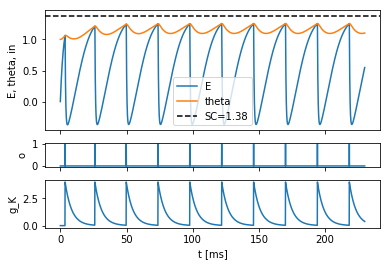

In [16]:
net.restore()
SC = 1.38
eta = 0

net.run(230*ms, report='stdout')

plotdepp_SC(M, SC)

Starting simulation at t=0. s for a duration of 230. ms
0.23 (100%) simulated in < 1s


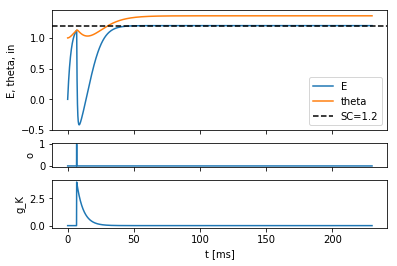

In [18]:
net.restore()
SC = 1.2
eta = 0

net.run(230*ms, report='stdout')

plotdepp_SC(M, SC)

Starting simulation at t=0. s for a duration of 230. ms
0.23 (100%) simulated in < 1s


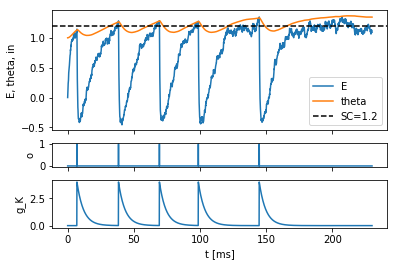

In [17]:
net.restore()
SC = 1.2
eta = 0.1

net.run(230*ms, report='stdout')

plotdepp_SC(M, SC)